<a href="https://colab.research.google.com/github/TahmidZee/HeartDiseaseML/blob/main/HeartDiseaseCrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset=pd.read_csv('/content/drive/MyDrive/Machine-learning-part-1-main/heart.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
print("Data shape:", dataset.shape)

Data shape: (303, 14)


In [8]:
for col in dataset.columns:
  print(col)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


In [9]:
X=dataset.iloc[:,0:13].values
x=dataset.iloc[:,0:13]
Y=dataset.iloc[:,13].values
y=dataset.iloc[:,13:14]
print("X shape",x.shape)
print("Y shape", y.shape)

X shape (303, 13)
Y shape (303, 1)


In [10]:
print("Attributes\n")
for col in x.columns:
  print(col)

print("Class\n")
for col in y.columns:
  print(col)

Attributes

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
Class

target


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
from sklearn.linear_model import LogisticRegression
classifier_lg= LogisticRegression(random_state= 0)

In [85]:
accuracy  = cross_val_score(classifier_lg, X,y, cv =10)
print(accuracy)

[0.87096774 0.80645161 0.83870968 0.9        0.83333333 0.76666667
 0.86666667 0.83333333 0.7        0.7       ]


In [17]:
print(accuracy.mean())

0.8116129032258066


In [18]:
pre = cross_val_score(classifier_lg, X, y, cv=10, scoring='precision_macro')
print(pre)

[0.9047619  0.81140351 0.83974359 0.89732143 0.83333333 0.79665072
 0.875      0.8492823  0.72222222 0.69909502]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [19]:
print(pre.mean())

0.822881402438291


In [84]:
rec = cross_val_score(classifier_lg, X, y, cv=10, scoring='recall_macro')
print(rec)

[0.85714286 0.79831933 0.83403361 0.90271493 0.82579186 0.77678571
 0.86160714 0.82589286 0.6875     0.69642857]


In [21]:
print(rec.mean())

0.8066216871363932


In [83]:
f1 = cross_val_score(classifier_lg, X, y, cv=10, scoring='f1_macro')
print(f1)

[0.86403509 0.80128205 0.83597884 0.8989899  0.82857143 0.76430976
 0.86425339 0.82857143 0.6827262  0.6969697 ]


In [23]:
print(f1.mean())

0.8065687790522895


In [24]:
from sklearn.model_selection import StratifiedKFold

In [45]:
skf = StratifiedKFold(n_splits=10, shuffle=False)

In [46]:
skf.get_n_splits(X,y)


10

In [47]:
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy   = []
precision  = []
recall     = []
f1_value   = []

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  classifier_lg.fit(X_train,Y_train)
  Y_pred = classifier_lg.predict(X_test)

  ac = accuracy_score(Y_test,Y_pred)
  pre = precision_score(Y_test,Y_pred)
  rec = recall_score(Y_test,Y_pred)
  f1  = f1_score(Y_test, Y_pred)

  accuracy.append(ac)
  precision.append(pre)
  recall.append(rec)
  f1_value.append(f1)

  

In [68]:
print(accuracy)


[0.8709677419354839, 0.8064516129032258, 0.8387096774193549, 0.9, 0.8333333333333334, 0.7666666666666667, 0.8666666666666667, 0.8333333333333334, 0.7, 0.7]


In [70]:
print(recall)

[1.0, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.625, 0.9375, 0.9375, 0.875, 0.75]


In [71]:
print(precision)

[0.8095238095238095, 0.7894736842105263, 0.8333333333333334, 0.9375, 0.8333333333333334, 0.9090909090909091, 0.8333333333333334, 0.7894736842105263, 0.6666666666666666, 0.7058823529411765]


In [73]:
print(f1_value)


[0.8947368421052632, 0.8333333333333333, 0.8571428571428571, 0.9090909090909091, 0.8571428571428571, 0.7407407407407406, 0.8823529411764706, 0.8571428571428572, 0.7567567567567567, 0.7272727272727272]


In [75]:
import matplotlib.pylab as plt
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches


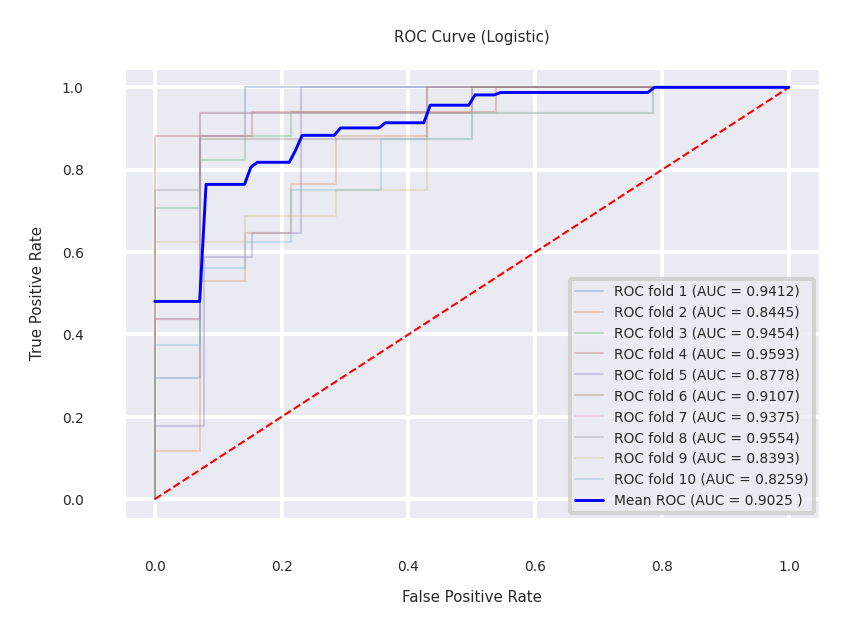

In [86]:
import seaborn as sn
random_state = np.random.RandomState(0)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
cv = StratifiedKFold(n_splits=10,shuffle=False)

tprs = []
acc = []
mean_fpr = np.linspace(0,1,100)

plt.figure(figsize=(3,2), dpi=300)
sn.set(font_scale=.3)
i = 1
for train,test in cv.split(X,y):
    prediction =classifier_lg.fit(X[train],Y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    acc.append(roc_auc)
    plt.plot(fpr, tpr, lw=.5, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = .5,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Mean ROC (AUC = %0.4f )' % (mean_auc),lw=.7, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [87]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',probability=True, random_state = 0)

In [88]:
accuracy  = cross_val_score(classifier_svm, X,y, cv =10)
print(accuracy)

[0.83870968 0.83870968 0.83870968 0.93333333 0.86666667 0.83333333
 0.83333333 0.8        0.7        0.8       ]


In [89]:
print(accuracy.mean())

0.8282795698924732


In [90]:
pre = cross_val_score(classifier_svm, X, y, cv=10, scoring='precision_macro')
print(pre)

[0.85454545 0.8375     0.85454545 0.9321267  0.87559809 0.86842105
 0.83333333 0.825      0.72222222 0.80555556]


In [91]:
print(pre.mean())

0.840884785579058


In [92]:
rec = cross_val_score(classifier_svm, X, y, cv=10, scoring='recall_macro')
print(rec)

[0.82773109 0.84033613 0.82773109 0.9321267  0.85520362 0.84375
 0.83482143 0.79017857 0.6875     0.79464286]


In [93]:
print(rec.mean())

0.8234021493212669


In [94]:
f1 = cross_val_score(classifier_svm, X, y, cv=10, scoring='f1_macro')
print(f1)

[0.83243243 0.83803553 0.83243243 0.9321267  0.86111111 0.83164983
 0.83314794 0.79166667 0.6827262  0.79638009]


In [95]:
print(f1.mean())

0.823170893593678


In [96]:
from sklearn.model_selection import StratifiedKFold

In [97]:
skf = StratifiedKFold(n_splits=10, shuffle=False)

In [99]:
skf.get_n_splits(X,y)

10

In [100]:
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy   = []
precision  = []
recall     = []
f1_value   = []

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  classifier_svm.fit(X_train,Y_train)
  Y_pred = classifier_svm.predict(X_test)

  ac = accuracy_score(Y_test,Y_pred)
  pre = precision_score(Y_test,Y_pred)
  rec = recall_score(Y_test,Y_pred)
  f1  = f1_score(Y_test, Y_pred)

  accuracy.append(ac)
  precision.append(pre)
  recall.append(rec)
  f1_value.append(f1)


In [102]:
print(accuracy)

[0.8387096774193549, 0.8387096774193549, 0.8387096774193549, 0.9333333333333333, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8, 0.7, 0.8]


In [103]:
print(precision)

[0.8, 0.875, 0.8, 0.9411764705882353, 0.8421052631578947, 1.0, 0.8666666666666667, 0.75, 0.6666666666666666, 0.7777777777777778]


In [104]:
print(recall)

[0.9411764705882353, 0.8235294117647058, 0.9411764705882353, 0.9411764705882353, 0.9411764705882353, 0.6875, 0.8125, 0.9375, 0.875, 0.875]


In [105]:
print(f1_value)

[0.8648648648648648, 0.8484848484848485, 0.8648648648648648, 0.9411764705882353, 0.8888888888888888, 0.8148148148148148, 0.8387096774193549, 0.8333333333333334, 0.7567567567567567, 0.823529411764706]


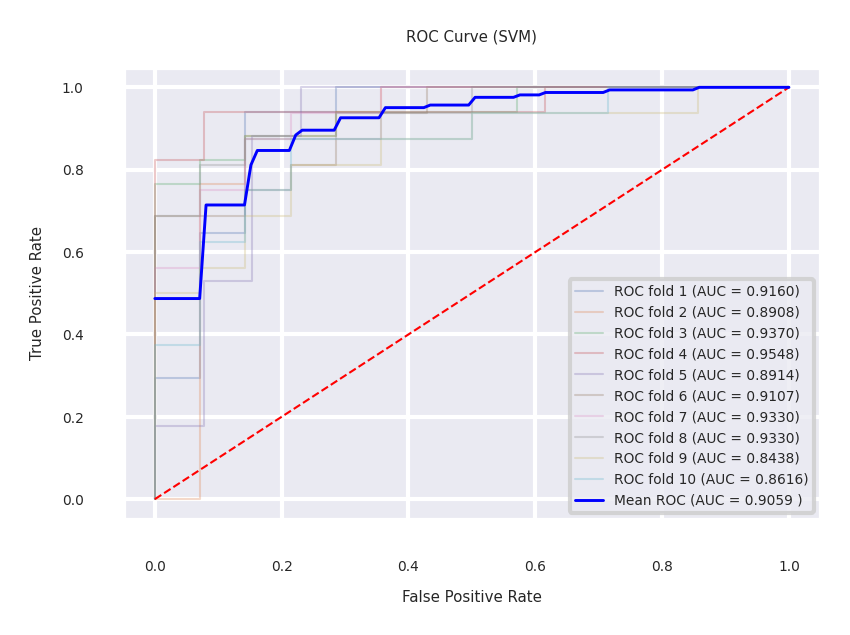

In [106]:
import seaborn as sn
random_state = np.random.RandomState(0)
from sklearn.svm import SVC
clf = SVC(random_state = 0)
cv = StratifiedKFold(n_splits=10,shuffle=False)

tprs = []
acc = []
mean_fpr = np.linspace(0,1,100)

plt.figure(figsize=(3,2), dpi=300)
sn.set(font_scale=.3)
i = 1
for train,test in cv.split(X,y):
    prediction =classifier_svm.fit(X[train],Y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    acc.append(roc_auc)
    plt.plot(fpr, tpr, lw=.5, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = .5,color = 'red')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Mean ROC (AUC = %0.4f )' % (mean_auc),lw=.7, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
